마할라노비스 거리:
 [0.61236472 0.77317689 0.26676623 0.99268806 0.68425213 0.39828834
 1.86933244 1.15690009 0.9902942  0.93358929 1.47795471 1.35579122
 0.47214877 1.14710179 0.4026782  1.80757435 1.00469712 1.71501619
 1.88590508 1.18798696 0.59412743 0.3388066  0.93060796 1.0685571
 1.81340921 0.67452799 0.90625684 0.53972638 0.55649396 0.47317379
 0.33264659 0.8163148  0.6210941  0.73673426 0.91215561 0.9102026
 1.17170012 2.68889769 0.44168651 1.83405731 0.34385839 1.6963916
 0.52457826 0.65003168 0.71343892 0.59512937 0.46227849 1.13400826
 0.16079319 0.34121577 0.96185553 0.63794482 0.32886642 1.5714052
 0.37579717 1.56391184 1.84827481 0.28290304 1.0832996  0.65021758
 1.44367929 2.30401248 1.32284503 0.62796172 0.61783185 1.30358858
 1.13555094 1.8108582  0.51549799 1.716239   0.79518617 1.4191885
 0.35175504 0.89128303 0.33286307 0.0896672  0.65565215 0.92007509
 1.37789179 1.36879215 1.27969036 1.66239363 0.64514914 0.99493596
 0.63797656 0.62281752 0.21351843 0.38012881 1.04815493

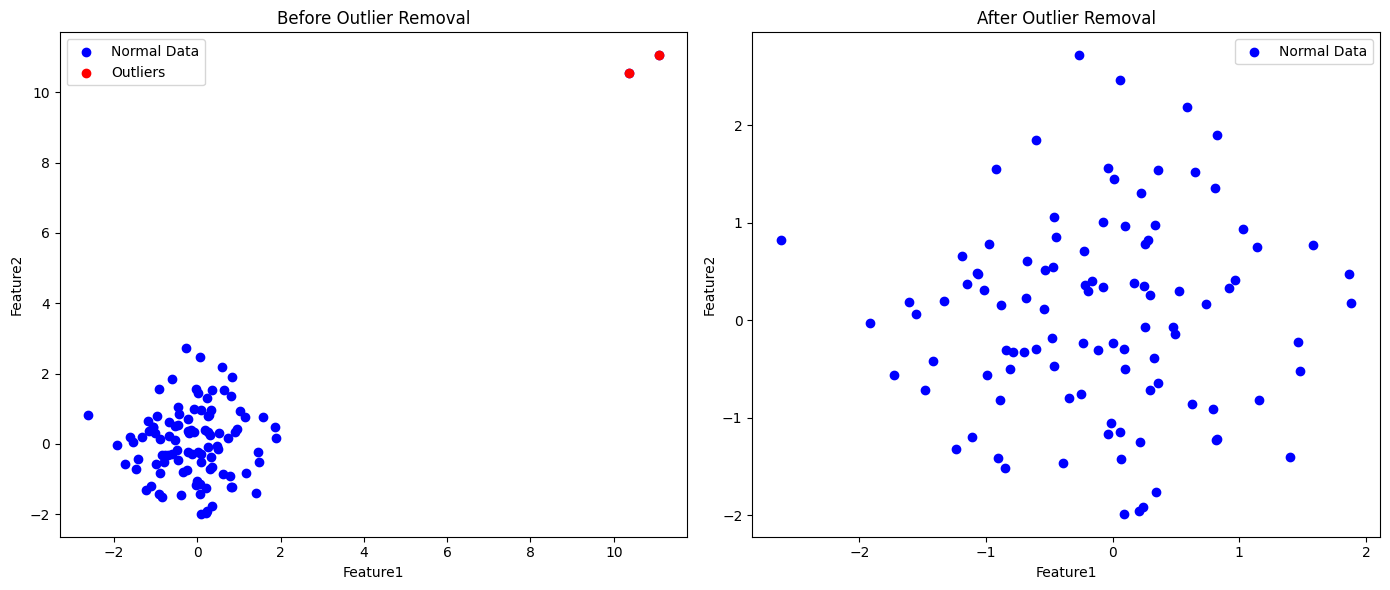

원본 데이터프레임 크기: (102, 2)
이상치 개수: 2
이상치 제거 후 데이터프레임 크기: (100, 2)


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# 1. 데이터 준비 (이상치 포함)
np.random.seed(42)
data_normal = np.random.randn(100, 2)  # 정상 데이터 생성
data_outliers = np.random.normal(loc=10, scale=1, size=(2, 2))  # 이상치 데이터 생성 (멀리 떨어진 점들로 설정)
data = np.vstack([data_normal, data_outliers])  # 정상 데이터와 이상치를 합침

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# 2. 마할라노비스 거리 계산 함수 정의
def calculate_mahalanobis(df, cov_matrix):
    mean_vector = df.mean().values
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    distances = []
    for index, row in df.iterrows():
        distance = mahalanobis(row.values, mean_vector, inv_cov_matrix)
        distances.append(distance)
        
    return np.array(distances)

# 공분산 행렬 계산
cov_matrix = np.cov(df.values, rowvar=False)

# 마할라노비스 거리 계산
mahalanobis_distances = calculate_mahalanobis(df, cov_matrix)

# 마할라노비스 거리 출력 (디버깅 목적)
print("마할라노비스 거리:\n", mahalanobis_distances)

# 3. 임계값 설정 및 이상치 탐지
threshold = chi2.ppf(0.95, df.shape[1])  # 95% 신뢰구간으로 임계값 낮춤

# 이상치 필터링
outliers = np.where(mahalanobis_distances > threshold)[0]
df_cleaned = df.drop(index=outliers)

# 4. 시각화: 이상치 제거 전후 데이터 트렌드 비교
plt.figure(figsize=(14, 6))

# 이상치 제거 전
plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Feature2'], color='blue', label='Normal Data')
plt.scatter(df.iloc[outliers]['Feature1'], df.iloc[outliers]['Feature2'], color='red', label='Outliers')
plt.title('Before Outlier Removal')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

# 이상치 제거 후
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned['Feature1'], df_cleaned['Feature2'], color='blue', label='Normal Data')
plt.title('After Outlier Removal')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

plt.tight_layout()
plt.show()

print("원본 데이터프레임 크기:", df.shape)
print("이상치 개수:", len(outliers))
print("이상치 제거 후 데이터프레임 크기:", df_cleaned.shape)

In [11]:
df

,Feature1,Feature2
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560
...,...,...
1000,-1.857870,-8.679803
1001,-3.023589,-7.780038
1002,6.164704,8.953761
1003,-8.553670,9.102304


In [12]:
df_cleaned

,Feature1,Feature2
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560
...,...,...
998,-0.026521,-0.881875
999,-0.163067,-0.744903
1000,-1.857870,-8.679803
1001,-3.023589,-7.780038


In [7]:
outliers

array([], dtype=int64)